In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn import datasets
import matplotlib.pyplot as pyplot
import seaborn as sn
sn.set(style="darkgrid")

In [6]:
irisdataset = pd.read_csv("data.csv") 
print(irisdataset.head()) 

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


In [7]:
irisdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
irisdataset.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
x = irisdataset.iloc[:, [0,1,2,3]].values

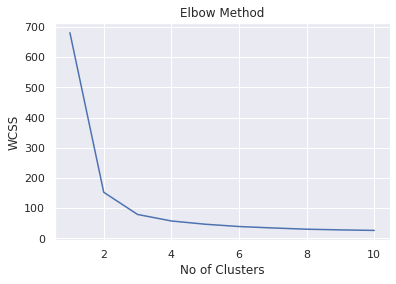

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plot.title('Elbow Method')
plot.xlabel('No of Clusters')
plot.ylabel('WCSS')
plot.plot(range(1,11), wcss)
plot.show()

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

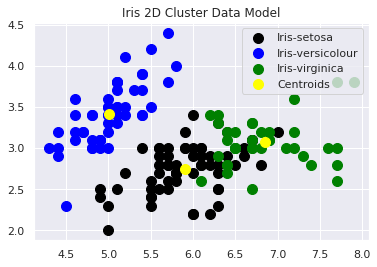

In [14]:
plot.title('Iris 2D Cluster Data Model')
plot.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Iris-setosa')
plot.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plot.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plot.legend()

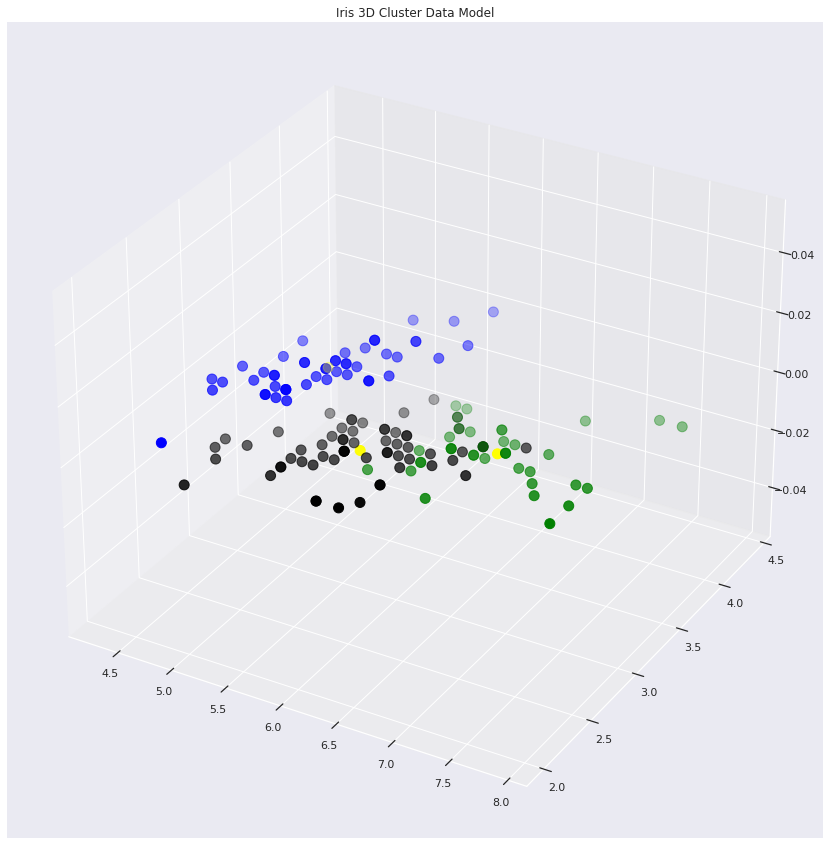

In [16]:
fig = plot.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plot.title('Iris 3D Cluster Data Model')
plot.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Iris-setosa')
plot.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plot.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plot.show()